In [201]:
import os
import kaggle
from getpass import getpass#Function to download Dataset from Kaggle.
from sklearn.model_selection import train_test_split
import sklearn as sks
import statsmodels.api as sm
from statsmodels.api import add_constant
from statsmodels.api import regression
from statsmodels.stats.outliers_influence import variance_inflation_factor as vf
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
from statsmodels.tools.eval_measures import rmse
warnings.filterwarnings("ignore")

In [2]:

def download_dataset(dataset, path):
    if 'KAGGLE_USERNAME' not in os.environ or 'KAGGLE_KEY' not in os.environ:
        os.environ['KAGGLE_USERNAME'] = input('Enter your Kaggle username: ')
        os.environ['KAGGLE_KEY'] = getpass('Enter your Kaggle API key: ')
    
    kaggle.api.dataset_download_files(dataset, path=path, unzip=True)

dataset = 'lakshmi25npathi/bike-sharing-dataset' 
path = './data' 

download_dataset(dataset, path)

Enter your Kaggle username:  kartikathwal
Enter your Kaggle API key:  ········


Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/bike-sharing-dataset


In [130]:
csv_file = os.path.join('./data', 'day.csv') 
df = pd.read_csv(csv_file)

In [131]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [133]:
df.drop("dteday", axis=1, inplace=True)

In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    int64  
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    int64  
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    int64  
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(11)
memory usage: 85.8 KB


<Axes: >

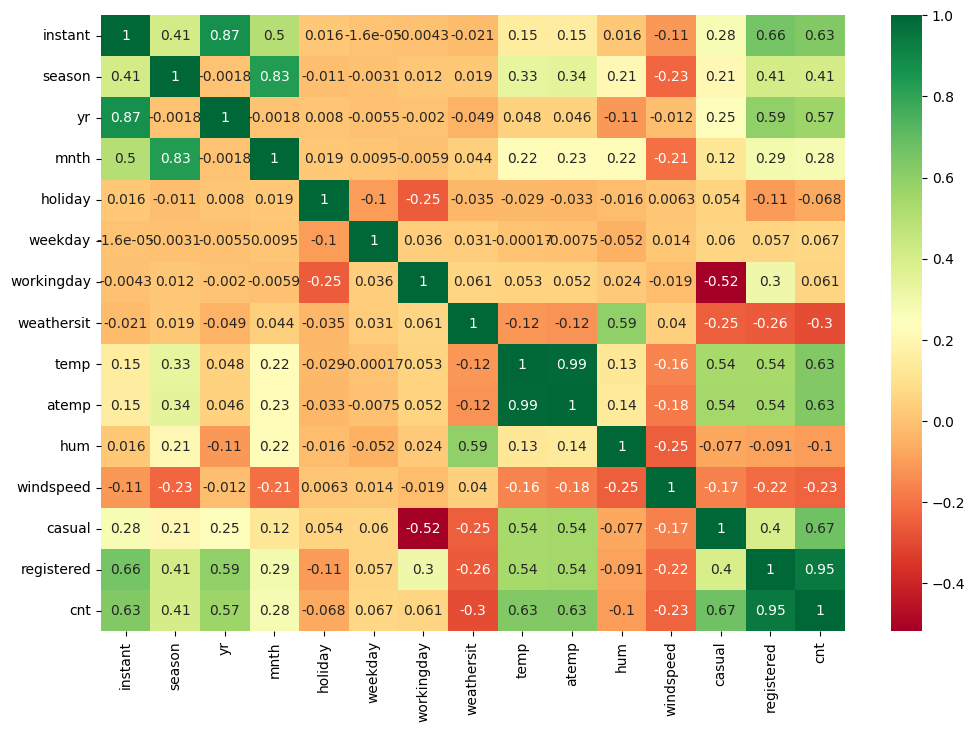

In [135]:
plt.figure(figsize=(12,8)) 
sns.heatmap(df.corr(), annot= True, cmap= "RdYlGn")



In [136]:
df.season.unique()

array([1, 2, 3, 4], dtype=int64)

In [137]:
season_dict={1:"spring", 2: "summer", 3: "fall", 4: "winter"}
weather_dict={1: "Clear, Few clouds, Partly cloudy, Partly cloudy",
2: "Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist",
3: "Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds",
4: "Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog"}

In [138]:
df.season=df.season.apply(lambda x: season_dict[x])

In [139]:
df.weathersit=df.weathersit.apply(lambda x: weather_dict[x])

In [140]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,spring,0,1,0,6,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,spring,0,1,0,0,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,spring,0,1,0,1,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,spring,0,1,0,2,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,spring,0,1,0,3,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [141]:
df[df.workingday==0].weekday.value_counts()

weekday
6    105
0    105
1     15
5      2
4      2
3      1
2      1
Name: count, dtype: int64

In [142]:
weekday_dict={0:"Sunday",1:"Monday",2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6:"Saturday"}

In [143]:
df.weekday=df.weekday.apply(lambda x: weekday_dict[x])

In [144]:
df.head()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,spring,0,1,0,Saturday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,spring,0,1,0,Sunday,0,"Mist + Cloudy, Mist + Broken clouds, Mist + Fe...",0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,spring,0,1,0,Monday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,spring,0,1,0,Tuesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,spring,0,1,0,Wednesday,1,"Clear, Few clouds, Partly cloudy, Partly cloudy",0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [145]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   season      731 non-null    object 
 2   yr          731 non-null    int64  
 3   mnth        731 non-null    int64  
 4   holiday     731 non-null    int64  
 5   weekday     731 non-null    object 
 6   workingday  731 non-null    int64  
 7   weathersit  731 non-null    object 
 8   temp        731 non-null    float64
 9   atemp       731 non-null    float64
 10  hum         731 non-null    float64
 11  windspeed   731 non-null    float64
 12  casual      731 non-null    int64  
 13  registered  731 non-null    int64  
 14  cnt         731 non-null    int64  
dtypes: float64(4), int64(8), object(3)
memory usage: 85.8+ KB


In [146]:
columns=["weekday", "weathersit", "season"]
for item in columns:
    temp=pd.get_dummies(df[item], drop_first=True, dtype=int)
    df.drop(columns=item, inplace=True)
    df=pd.concat([df,temp], axis=1)

In [147]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 23 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   instant                                                                                  731 non-null    int64  
 1   yr                                                                                       731 non-null    int64  
 2   mnth                                                                                     731 non-null    int64  
 3   holiday                                                                                  731 non-null    int64  
 4   workingday                                                                               731 non-null    int64  
 5   temp                                                            

<Axes: >

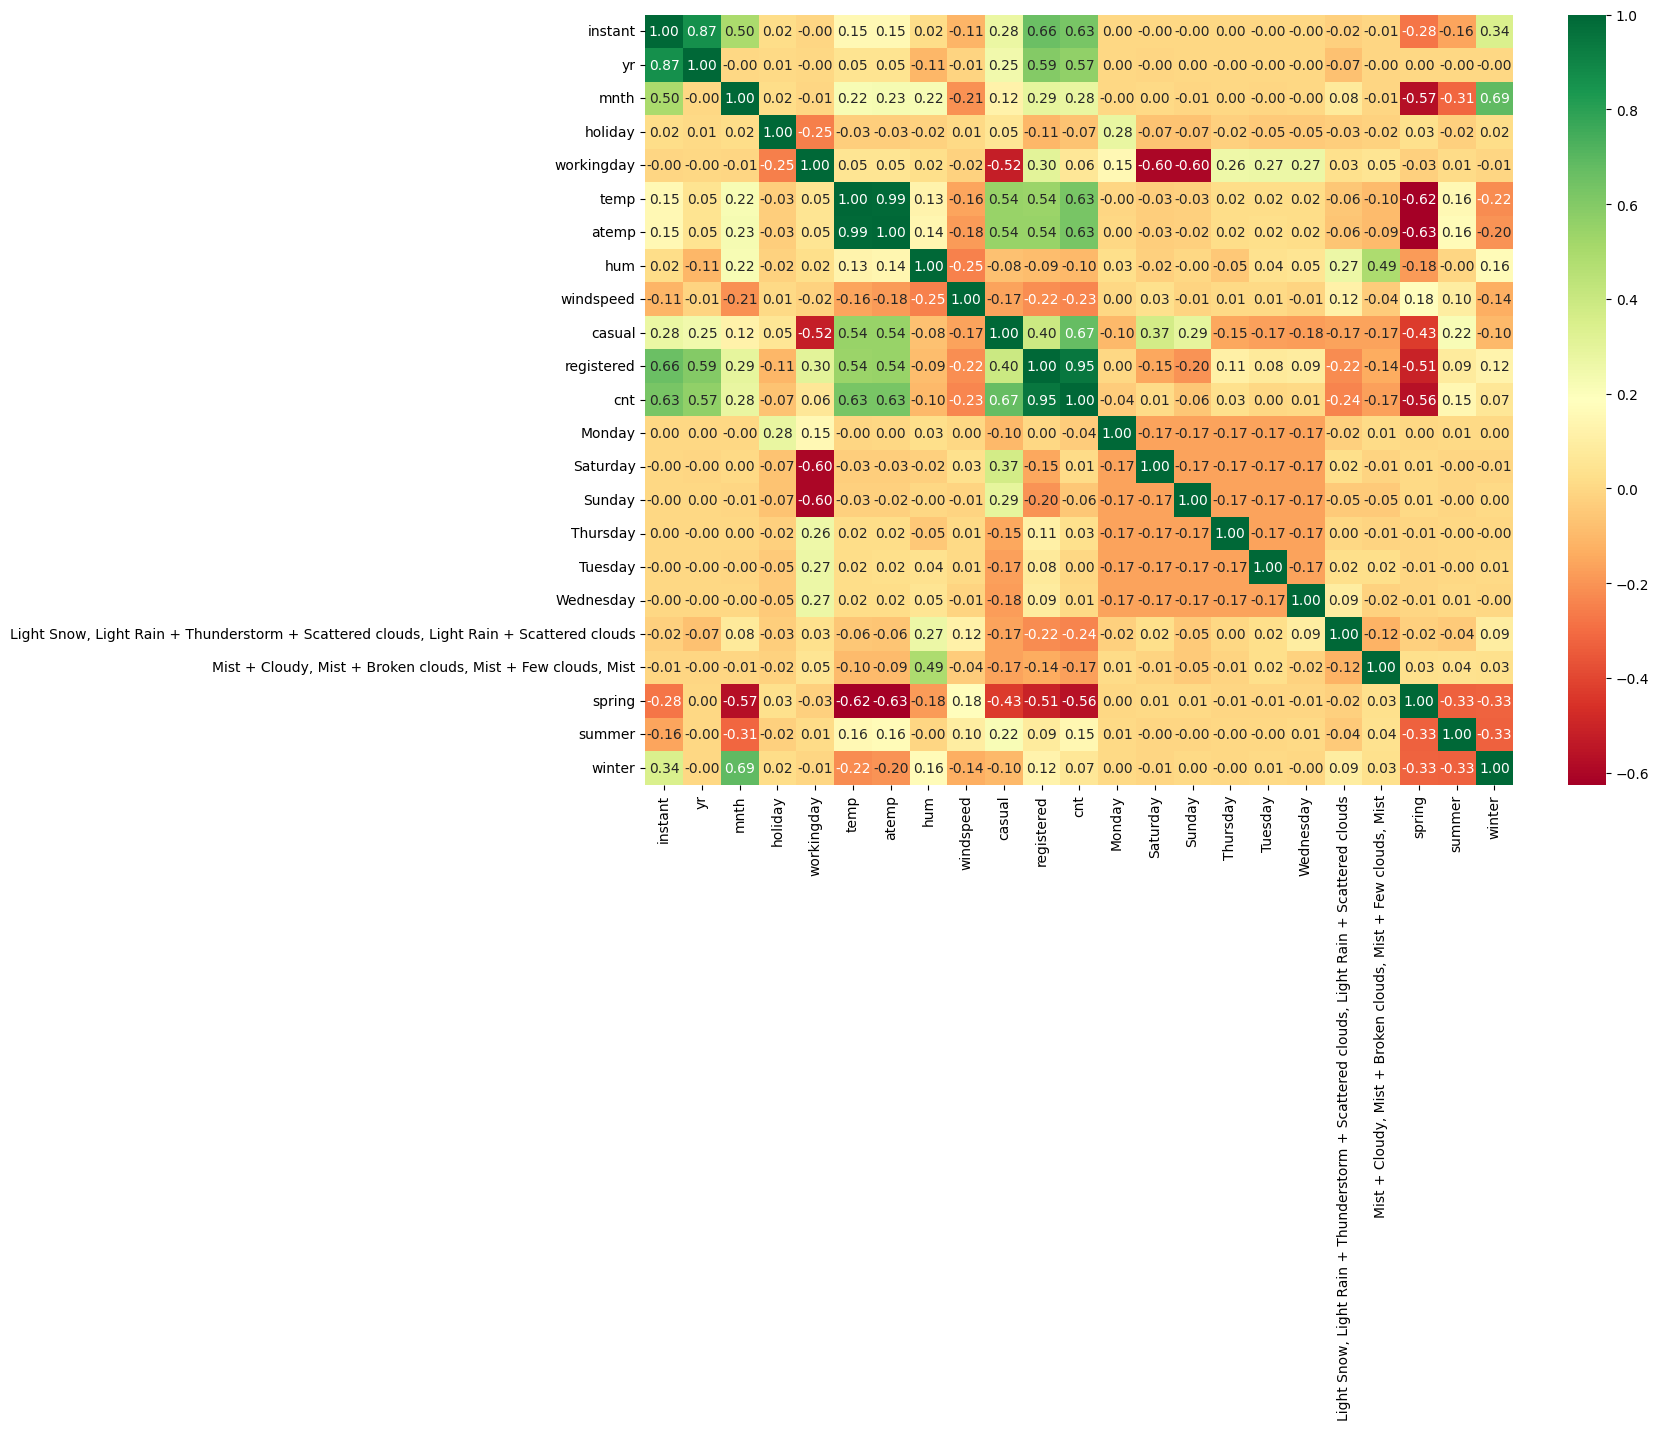

In [148]:
plt.figure(figsize=(14,10)) 
sns.heatmap(df.corr(), annot= True, cmap= "RdYlGn", fmt='.2f')

In [149]:
df.columns

Index(['instant', 'yr', 'mnth', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'cnt', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'spring', 'summer', 'winter'],
      dtype='object')

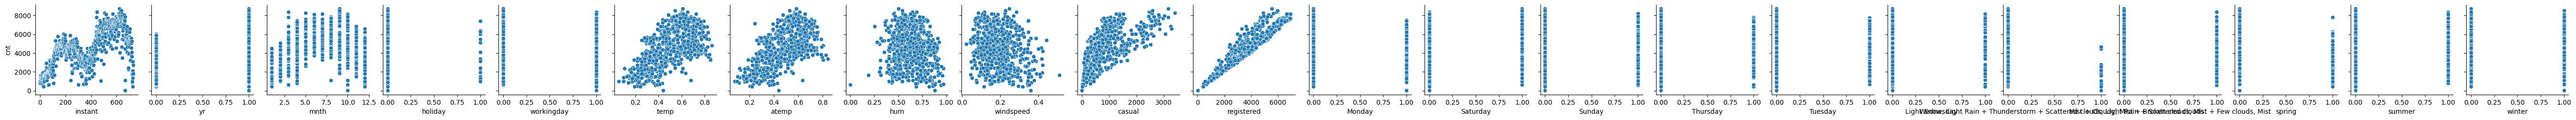

In [152]:
sns.pairplot(x_vars= ['instant', 'yr', 'mnth', 'holiday', 'workingday', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'spring', 'summer', 'winter'], y_vars= "cnt", data = df)

In [153]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=100)

In [154]:
print(df_train.shape, df_test.shape)

(584, 23) (147, 23)


In [155]:
scaler=MinMaxScaler()

In [156]:
col = ['instant', 'mnth', 'temp', 'atemp',
       'hum', 'windspeed', 'casual', 'registered']
df[col].describe()

,instant,mnth,temp,atemp,hum,windspeed,casual,registered
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,6.519836,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367
std,211.165812,3.451913,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377
min,1.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000
25%,183.500000,4.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000
50%,366.000000,7.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000
75%,548.500000,10.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000
max,731.000000,12.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000


In [118]:
df[col].describe()

,instant,mnth,temp,atemp,hum,windspeed,casual,registered
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,6.519836,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367
std,211.165812,3.451913,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377
min,1.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000
25%,183.500000,4.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000
50%,366.000000,7.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000
75%,548.500000,10.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000
max,731.000000,12.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000


In [157]:
df_train[col] = scaler.fit_transform(df_train[col])

In [158]:
scaler

MinMaxScaler()

In [159]:
y_train = df_train.pop("cnt")
X_train = df_train
X_train_sm = add_constant(X_train)

In [160]:
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.034e+30
Date:                Sun, 28 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:17:54   Log-Likelihood:                 13965.
No. Observations:                 584   AIC:                        -2.789e+04
Df Residuals:                     562   BIC:                        -2.779e+04
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                      17.6000   3.35e-12   5.26e+12      0.000      17.600      17.600
instant                                                                                 -8.185e-12   3.45e-11     -0.237      0.812   -7.59e-11    5.96e-11
yr                                                                                       2.728e-12   1.74e-11      0.157      0.876   -3.15e-11    3.69e-11
mnth                                                                                     4.547e-12   1.61e-11      0.283      0.777    -2.7e-11    3.61e-11
holiday                                                                                     4.4000   2.51e-12   1.75e+12      0.000       4.400       4.400
workingday                                                                                  4.4000   1.53e-12   2.88e+12      0.000       4.400       4.400
temp                                                                                     4.547e-12   1.51e-11      0.301      0.764   -2.51e-11    3.42e-11
atemp                                                                                    6.366e-12   1.54e-11      0.412      0.680    -2.4e-11    3.67e-11
hum                                                                                     -3.183e-12   4.03e-12     -0.789      0.430   -1.11e-11    4.74e-12
windspeed                                                                                1.819e-12   2.95e-12      0.617      0.537   -3.97e-12    7.61e-12
casual                                                                                   3250.0000   4.04e-12   8.04e+14      0.000    3250.000    3250.000
registered                                                                               6926.0000   4.88e-12   1.42e+15      0.000    6926.000    6926.000
Monday                                                                                    7.39e-13    1.7e-12      0.436      0.663   -2.59e-12    4.07e-12
Saturday                                                                                    4.4000   1.46e-12   3.01e+12      0.000       4.400       4.400
Sunday                                                                                      4.4000   1.43e-12   3.07e+12      0.000       4.400       4.400
Thursday                                                                                -1.364e-12    1.7e-12     -0.801      0.424   -4.71e-12    1.98e-12
Tuesday                                                                                 -1.364e-12   1.64e-12     -0.83

In [161]:
vif = pd.DataFrame()
vif["features"] = X_train_sm.columns
vif["variance"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif.sort_values("variance", ascending= False)

,features,variance
13,Saturday,inf
4,holiday,inf
5,workingday,inf
14,Sunday,inf
1,instant,566.451377
2,yr,429.331813
3,mnth,145.701604
6,temp,65.786309
7,atemp,60.303437
11,registered,7.003594


In [162]:
col_to_choose = X_train.columns

In [165]:
col_to_choose = ['instant', 'yr', 'mnth', 'holiday', 'workingday', 'atemp',
       'hum', 'windspeed', 'casual', 'registered', 'Monday', 'Saturday',
       'Sunday', 'Thursday', 'Tuesday', 'Wednesday',
       'Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds',
       'Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist',
       'spring', 'summer', 'winter']

In [166]:
X_train = X_train[col_to_choose]
X_train_sm = add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 7.962e+29
Date:                Sun, 28 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:19:40   Log-Likelihood:                 13874.
No. Observations:                 584   AIC:                        -2.771e+04
Df Residuals:                     563   BIC:                        -2.762e+04
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
===========================================================================================================================================================
                                                                                              coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                                      17.6000   3.89e-12   4.52e+12      0.000      17.600      17.600
instant                                                                                  3.274e-11   4.02e-11      0.814      0.416   -4.63e-11    1.12e-10
yr                                                                                      -1.364e-11   2.03e-11     -0.672      0.502   -5.35e-11    2.63e-11
mnth                                                                                    -1.637e-11   1.87e-11     -0.873      0.383   -5.32e-11    2.05e-11
holiday                                                                                     4.4000   2.92e-12   1.51e+12      0.000       4.400       4.400
workingday                                                                                  4.4000   1.78e-12   2.47e+12      0.000       4.400       4.400
atemp                                                                                    8.129e-12   4.97e-12      1.637      0.102   -1.63e-12    1.79e-11
hum                                                                                     -3.638e-12   4.71e-12     -0.773      0.440   -1.29e-11    5.61e-12
windspeed                                                                               -4.547e-12   3.35e-12     -1.359      0.175   -1.11e-11    2.03e-12
casual                                                                                   3250.0000    4.7e-12   6.91e+14      0.000    3250.000    3250.000
registered                                                                               6926.0000   5.68e-12   1.22e+15      0.000    6926.000    6926.000
Monday                                                                                           0   1.97e-12          0      1.000   -3.87e-12    3.87e-12
Saturday                                                                                    4.4000    1.7e-12   2.58e+12      0.000       4.400       4.400
Sunday                                                                                      4.4000   1.67e-12   2.63e+12      0.000       4.400       4.400
Thursday                                                                                 9.095e-13   1.99e-12      0.458      0.647   -2.99e-12    4.81e-12
Tuesday                                                                                   3.24e-12   1.91e-12      1.699      0.090   -5.06e-13    6.99e-12
Wednesday                                                                               -3.126e-13   1.91e-12     -0.16

In [167]:
vif = pd.DataFrame()
vif["features"] = X_train_sm.columns
vif["variance"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif.sort_values("variance", ascending= False)

,features,variance
4,holiday,inf
5,workingday,inf
12,Saturday,inf
13,Sunday,inf
1,instant,565.377711
2,yr,428.357990
3,mnth,145.448595
10,registered,6.958124
19,spring,5.687405
6,atemp,4.581294


In [168]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

estimator = LinearRegression()
selector = RFE(estimator, n_features_to_select=12)
selector.fit(X_train, y_train)
print(selector.support_)


[False  True  True  True  True  True False  True  True  True False  True
  True False False  True False False False  True False]


In [169]:
tru_val = selector.support_

In [170]:
all_col = X_train.columns

In [171]:
col_to_choose = [all_col[i] for i in range(len(all_col)) if tru_val[i]==True ]

In [172]:
col_to_choose

['yr',
 'mnth',
 'holiday',
 'workingday',
 'atemp',
 'windspeed',
 'casual',
 'registered',
 'Saturday',
 'Sunday',
 'Wednesday',
 'summer']

In [173]:
X_train = X_train[col_to_choose]
X_train_sm = add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.549e+30
Date:                Sun, 28 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:21:39   Log-Likelihood:                 13889.
No. Observations:                 584   AIC:                        -2.775e+04
Df Residuals:                     572   BIC:                        -2.770e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         17.6000   1.64e-12   1.08e+13      0.000      17.600      17.600
yr         -4.036e-12   1.44e-12     -2.804      0.005   -6.86e-12   -1.21e-12
mnth       -1.194e-12   1.81e-12     -0.658      0.511   -4.76e-12    2.37e-12
holiday        4.4000   2.44e-12    1.8e+12      0.000       4.400       4.400
workingday     4.4000   1.36e-12   3.22e+12      0.000       4.400       4.400
atemp      -6.821e-13    3.4e-12     -0.201      0.841   -7.36e-12       6e-12
windspeed  -1.876e-12   3.06e-12     -0.613      0.540   -7.89e-12    4.13e-12
casual      3250.0000   4.41e-12   7.37e+14      0.000    3250.000    3250.000
registered  6926.0000   4.55e-12   1.52e+15      0.000    6926.000    6926.000
Saturday       4.4000   1.36e-12   3.24e+12      0.000       4.400       4.400
Sunday         4.4000   1.28e-12   3.43e+12      0.000       4.400       4.400
Wednesday   -1.45e-12    1.4e-12     -1.037      0.300   -4.19e-12     1.3e-12
summer       1.08e-12   1.25e-12      0.864      0.388   -1.38e-12    3.54e-12
==============================================================================
Omnibus:                       14.557   Durbin-Watson:                   0.167
Prob(Omnibus):                  0.001   Jarque-Bera (JB):                9.349
Skew:                          -0.163   Prob(JB):                      0.00933
Kurtosis:                       2.473   Cond. No.                     5.26e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.15e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [174]:
vif = pd.DataFrame()
vif["features"] = X_train_sm.columns
vif["variance"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif.sort_values("variance", ascending= False)

,features,variance
3,holiday,inf
4,workingday,inf
9,Saturday,inf
10,Sunday,inf
8,registered,4.777073
7,casual,3.900300
1,yr,2.299823
5,atemp,2.297554
2,mnth,1.456600
12,summer,1.290341


In [185]:
col_to_choose =['registered',
	'casual'	,
    'yr',
    'atemp',
	'mnth',	
    'summer',	
    'windspeed',
    'Wednesday']

In [186]:
X_train = X_train[col_to_choose]
X_train_sm = add_constant(X_train)
lr = sm.OLS(y_train, X_train_sm)
lr_model = lr.fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.186e+32
Date:                Sun, 28 Jul 2024   Prob (F-statistic):               0.00
Time:                        18:27:10   Log-Likelihood:                 15062.
No. Observations:                 584   AIC:                        -3.011e+04
Df Residuals:                     575   BIC:                        -3.007e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.0000   2.62e-13   8.41e+13      0.000      22.000      22.000
registered  6926.0000   5.01e-13   1.38e+16      0.000    6926.000    6926.000
casual      3250.0000   3.91e-13   8.32e+15      0.000    3250.000    3250.000
yr         -1.194e-12   1.86e-13     -6.434      0.000   -1.56e-12   -8.29e-13
atemp       2.217e-12   4.47e-13      4.965      0.000    1.34e-12    3.09e-12
mnth        3.411e-13   2.39e-13      1.429      0.153   -1.28e-13     8.1e-13
summer     -7.958e-13   1.66e-13     -4.791      0.000   -1.12e-12    -4.7e-13
windspeed  -1.648e-12   4.09e-13     -4.033      0.000   -2.45e-12   -8.46e-13
Wednesday   1.137e-13   1.86e-13      0.611      0.541   -2.52e-13    4.79e-13
==============================================================================
Omnibus:                        4.256   Durbin-Watson:                   0.895
Prob(Omnibus):                  0.119   Jarque-Bera (JB):                3.596
Skew:                           0.104   Prob(JB):                        0.166
Kurtosis:                       2.676   Cond. No.                         15.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [187]:
vif = pd.DataFrame()
vif["features"] = X_train_sm.columns
vif["variance"] = [vf(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif.sort_values("variance", ascending= False)

,features,variance
0,const,16.936270
1,registered,3.222814
4,atemp,2.206901
3,yr,2.129905
2,casual,1.708442
5,mnth,1.404571
6,summer,1.269471
7,windspeed,1.133388
8,Wednesday,1.095889


In [188]:
col

['instant',
 'mnth',
 'temp',
 'atemp',
 'hum',
 'windspeed',
 'casual',
 'registered']

In [189]:
df_test[col] = scaler.transform(df_test[col])

In [190]:
y_test_actual = df_test.pop("cnt")

In [191]:
X_test = df_test

In [192]:
X_test_sm = add_constant(X_test[col_to_choose])

In [196]:
y_pred=lr_model.predict(X_test_sm)

In [199]:
from sklearn.metrics import r2_score

In [204]:
rmse = rmse(y_test_actual, y_pred)

In [205]:
rmse

1.5215536048655912e-12